# Final Project- Twitter analytics for iPhone Vs Samsung

## 1. Business questions

#### We want to see what is drving people towards samsung or iphone, is it just thier popular phones or is something more, such as brand, or other products they both offer? What are people talking about in real time to understand the consumer and how each of these companies can use this data to thier adavantage is something we are looking to get out of this project.  

 Kendell Walden, Andrew Marsh "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## 2. Data identification and collection - tweets

In [1]:
# import popular packages
import csv
import pandas as pd
import re
import json
from textblob import TextBlob  


import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

##### Loading in data that I have collected for tweets with ['samsung s10','s10'])


In [3]:
with open('data/twitterSamsung.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictiona

In [5]:
#
import json

# create an empty list to store our tweets in
datas = []

# append each line of the data to our tweets list using the json module
for line in open('data/twitterSamsung.json'):
    try:
        datas.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(datas))

594


#### Loading in data from iphone collection for tweets with 'Iphone Xs'
##### Collection of these tweets are coming very fast, much quicker than samsung. Very popular tweet 

In [6]:
with open('data/twitteriphone.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
     

In [8]:

#
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/twitteriphone.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(data))

612


#### Number of samsung s10 tweets : 594
#### Number of Iphone Xs tweets:  612

#### Took Samsung tweets to collect a couple of hours while iphone only 10 minutes!


## 3a. Samsung s10- Data Cleaning and Text preprocessing


In [9]:
for i in datas[:5]:
    print(i)

{'created_at': 'Mon May 06 19:17:00 +0000 2019', 'id': 1125479593694117888, 'id_str': '1125479593694117888', 'text': '@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !!', 'display_text_range': [12, 93], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': 1125119344424423426, 'in_reply_to_status_id_str': '1125119344424423426', 'in_reply_to_user_id': 168554230, 'in_reply_to_user_id_str': '168554230', 'in_reply_to_screen_name': 'TopesdGama', 'user': {'id': 1115578077088817152, 'id_str': '1115578077088817152', 'name': 'Carlos', 'screen_name': 'Carlos_florez_c', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 0, 'friends_count': 103, 'listed_count': 0, 'favourites_count': 19, 'statuses_count': 10, 'created_at': 'Tue Apr 09 11:31:54 +0000 2019', 'utc_offset': None, 'time_z

In [10]:
for i in datas[:5]:
    print(i['text'])


@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !!
RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎

x10 PS4 PRO
x10 Galaxy S10

20 GANADORES ;)

Vídeo ▶ https://t.co/VbWEzV9mwQ
Lin…
RT @litGaws: Rules to get a Free IPhone Xs or Samsung S10:

-Have the money on Paypal ready
(America 20$ / Europe 15$ / Afrika and Asia 20$…
Galaxy S10+はいつ頃出るんじゃ。
my 7edgeのライフがヤバ気なのだが。
@livewithmusic03 Oi eu queria saber se vc joga fortinait se não vc poderia medar uma skin que exclusiva do s10


#### How many tweets are in our data set

In [11]:

texts = [T['text'] for T in datas if 'text' in T]
len(texts)


594

In [12]:
tweets = []
for T in datas:
    if 'text' in T:
        tweets.append(T)
len(tweets)   


594

In [13]:
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re

#### We are cleaning our data for samsung and iphone we needed to get rid of alot of "extra" words that are in our json file that are not meaningful to our analysis. Alot of the stop words are things such as lang, phone, retweet and jpg.

In [14]:
def text_processing(tweets):
    # what if you have additional stopwords to be removed
    tokens = str(tweets)
    #lowecases
    tokens = tokens.lower()
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
    #additional stopwrods
    more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    return tokens

## 3b. Iphone - Data Cleaning and Text preprocessing

In [15]:
for i in data[:2]:
    print(i['text'])

RT @News_Ejazah: جاهزين ..؟

الجائزة: ( جهاز iPhone XS 📱 )

المسابقة بتكون بحساب الراعي
نحن مجرد داعمين حفظكم الله
السحب عندهم

بتشارك ضرور…
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا…


In [16]:
texti = [T['text'] for T in data if 'text' in T]
len(texti)

# how many tweets we have.

612

In [17]:
tweetsi = []
for T in data:
    if 'text' in T:
        tweetsi.append(T)
len(tweetsi)   


612

In [18]:

def text_processing(tweetsi):
    # what if you have additional stopwords to be removed
    tokens = str(tweetsi)
    #lowecases
    tokens = tokens.lower()
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
    #additional stopwrods
    more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    return tokens

## 4a.Samsung - Descriptive analytics 

In [19]:
fdist = nltk.FreqDist(text_processing(tweets))
fdist

FreqDist({'background': 5405, 'color': 5400, 'screen': 3982, 'display': 3808, 'photo': 2994, 'expanded': 2643, 'banner': 1740, 'small': 1587, 'friend': 1190, 'description': 1168, ...})

In [20]:
# Cleaned samsung saved
Cleaneds = fdist.most_common(100)

In [21]:
fdist.most_common(15)

[('background', 5405),
 ('color', 5400),
 ('screen', 3982),
 ('display', 3808),
 ('photo', 2994),
 ('expanded', 2643),
 ('banner', 1740),
 ('small', 1587),
 ('friend', 1190),
 ('description', 1168),
 ('notification', 1146),
 ('video', 1144),
 ('use', 1101),
 ('coordinate', 1098),
 ('place', 1095)]

### Plot of most popular words 

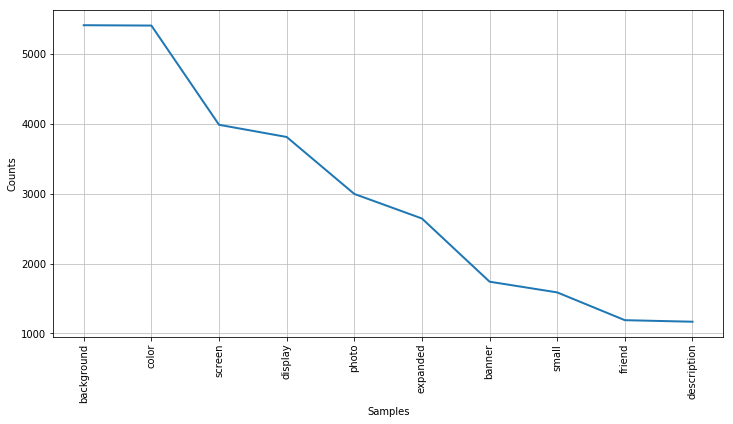

In [22]:
plt.figure(figsize=(12,6))
fdist.plot(10)

In [23]:
for i in datas [:5]:
    print(i['user']['screen_name'])
    
#Usernames.

Carlos_florez_c
AnitaClapton5
ShawnSarazin1
azuuuuusa0426
Otavio20391850


### Bi-Gram

In [24]:
tokens = str(tweets)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi_auto = nltk.FreqDist(bigrams)
fdist_bi_auto

FreqDist({('background', 'background'): 1906, ('photo', 'small'): 1516, ('photo', 'photo'): 1465, ('display', 'expanded'): 1388, ('rel', 'nofollow'): 1080, ('truncated', 'screen'): 1080, ('protected', 'verified'): 1080, ('verified', 'friend'): 1080, ('friend', 'listed'): 1080, ('listed', 'favourite'): 1080, ...})

### Word Cloud for Samsung

(-0.5, 399.5, 199.5, -0.5)

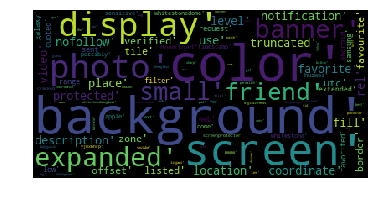

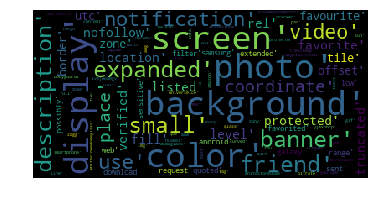

In [25]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(Cleaneds)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 4a.Iphone - Descriptive analytics 

In [26]:
fdisti = nltk.FreqDist(text_processing(tweetsi))
fdisti

FreqDist({'background': 6925, 'color': 6925, 'screen': 4537, 'display': 3790, 'photo': 2993, 'expanded': 2458, 'banner': 2306, 'small': 1473, 'notification': 1429, 'friend': 1387, ...})

In [27]:
# Cleaned iphone saved
Cleanedi = fdisti.most_common(100)

In [28]:
fdisti.most_common(15)

[('background', 6925),
 ('color', 6925),
 ('screen', 4537),
 ('display', 3790),
 ('photo', 2993),
 ('expanded', 2458),
 ('banner', 2306),
 ('small', 1473),
 ('notification', 1429),
 ('friend', 1387),
 ('rel', 1385),
 ('nofollow', 1385),
 ('truncated', 1385),
 ('location', 1385),
 ('description', 1385)]

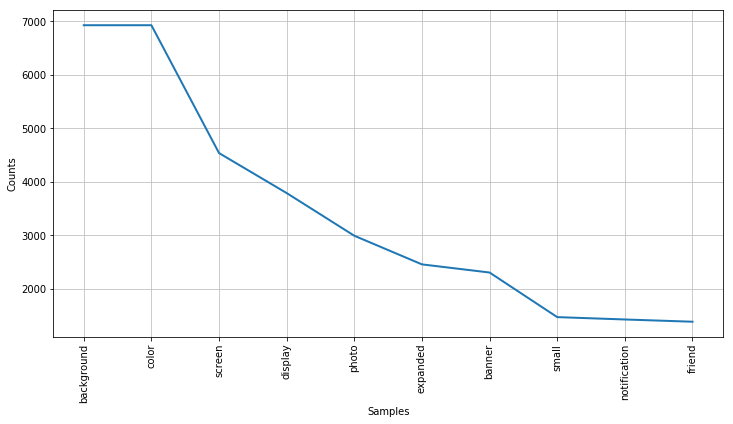

In [29]:
plt.figure(figsize=(12,6))
fdisti.plot(10)

In [30]:
tokens = str(tweetsi)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_i_auto = nltk.FreqDist(bigrams)
fdist_i_auto

FreqDist({('background', 'background'): 2704, ('screen', 'screen'): 1621, ('photo', 'photo'): 1473, ('photo', 'small'): 1473, ('display', 'expanded'): 1461, ('rel', 'nofollow'): 1385, ('truncated', 'screen'): 1385, ('protected', 'verified'): 1385, ('verified', 'friend'): 1385, ('friend', 'listed'): 1385, ...})

### Word Cloud for iphone

(-0.5, 399.5, 199.5, -0.5)

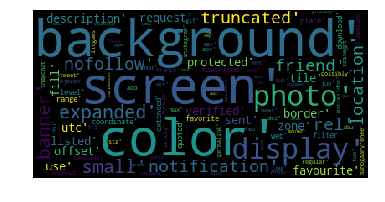

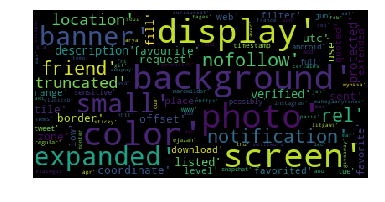

In [31]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(Cleanedi)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

## 5a. Samsung - Content analytics - sentiment analysis

#### ** Creating dataframe for tweets about samsung and iPhone to use for sentiment analysis. We made this next cell NBConvert because we do not need to create the csv again and would tamper with our code following. We have attached both csv in our files to load in our dataframes. **

In [33]:
df = pd.read_csv("tweetsSamsung.csv")
df.head()

,id,created at,text,screen_names,followers_count,friends_count,name,lat,lon,place name,place type
0,1125479593694117888,Mon May 06 19:17:00 +0000 2019,"@TopesdGama Venían de obsequio con mi S10, has...",Carlos_florez_c,0,103,Carlos,NaN,NaN,NaN,NaN
1,1125479731783139329,Mon May 06 19:17:33 +0000 2019,RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCR...,AnitaClapton5,7,444,Anita Clapton,NaN,NaN,NaN,NaN
2,1125479753929175041,Mon May 06 19:17:38 +0000 2019,RT @litGaws: Rules to get a Free IPhone Xs or ...,ShawnSarazin1,1012,4892,Crypto@Sarazin,NaN,NaN,NaN,NaN
3,1125479779476561920,Mon May 06 19:17:44 +0000 2019,Galaxy S10+はいつ頃出るんじゃ。\nmy 7edgeのライフがヤバ気なのだが。,azuuuuusa0426,4,25,あずさ@コナ垢,NaN,NaN,NaN,NaN
4,1125479790952185856,Mon May 06 19:17:47 +0000 2019,@livewithmusic03 Oi eu queria saber se vc joga...,Otavio20391850,1,3,Otavio,NaN,NaN,NaN,NaN


#### Cleaning our new samsung dataset

In [34]:
df['text'] = df.text.str.replace('\d+', '')

In [35]:
#Remove urls and the update the column
df['text'] = df.text.str.replace('http\S+|www.\S+', '')

In [36]:
# rid of useless characters
df['text'] = df.text.str.replace('[^a-zA-Z0-9]+', ' ')

In [37]:
df['text'] = df.text.str.findall('\w{3,}').str.join(' ')

In [38]:
# Remove stopwords
from nltk.corpus import stopwords
#additional stopwrods
more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
stopwords = stopwords.words('english')

In [39]:
df['text'] = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [40]:
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
# what if you have additional stopwords to be removed
df['text'] = df.text.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))

In [41]:
df.head(1)

,id,created at,text,screen_names,followers_count,friends_count,name,lat,lon,place name,place type
0,1125479593694117888,Mon May 06 19:17:00 +0000 2019,TopesdGama Ven obsequio con hasta momento geni...,Carlos_florez_c,0,103,Carlos,NaN,NaN,NaN,NaN


#### We need to convert text column in our df to str so we can run sentiment analysis.

In [42]:
best = df.text.astype(str)

### TextBlob

In [212]:
for row in best[:5]:
    print(TextBlob(row).sentiment.polarity, TextBlob(row).sentiment.subjectivity)

0.0 0.0
0.0 0.0
0.30000000000000004 0.65
0.0 0.0
0.0 0.0


In [213]:
positive_review = []
negative_review = []
neutral_review = []

for row in best:
    #tweet = row[0]
    score = TextBlob(row).sentiment.polarity
    if score > 0:
        positive_review.append(row)
    elif score == 0:
        neutral_review.append(row)
    else:
        negative_review.append(row)

In [214]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

153
40
401


### Bing Liu

In [215]:
# Sentiment analysis using Big Liu
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in best]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "r").read().splitlines()
negative_words = open("data/negative-words.txt", "r").read().splitlines()

for sentence in texts[:5]:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print(positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative")

0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 0 0 Neutral
0 0 0 Neutral


In [216]:
# Reviews in dataframes of the bing liu's analysis

positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [217]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

195
58
341


### Vadar Analysis

In [218]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [219]:
analyzer = SentimentIntensityAnalyzer()

In [220]:
for sentence in best[:5]:
    #sentence = row[0]
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    print((str(vs["compound"])))
    

0.0
0.0
0.7003
0.0
0.0


In [221]:
#vadar analysis for finding postive and neg reviews
positive_review = []
negative_review = []
neutral_review = []

for sentence in documents:
    #tweet = row[0]
    score = analyzer.polarity_scores(sentence)
    mvs = score["compound"]
    if mvs > 0:
        positive_review.append(sentence)
    elif mvs == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [222]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

219
31
344


## 5b. Iphone - Content analytics - sentiment analysis

#### See above for next cell as RAW NBconvert 

In [224]:
df1 = pd.read_csv("tweetsIphone.csv")
df1.head()

,id,created at,text,screen_names,followers_count,friends_count,name,lat,lon,place name,place type
0,1125508849287553029,Mon May 06 21:13:15 +0000 2019,RT @News_Ejazah: جاهزين ..؟\n\nالجائزة: ( جهاز iPhone XS 📱 )\n\nالمسابقة بتكون بحساب الراعي\nنحن مجرد داعمين حفظكم الله\nالسحب عندهم\n\nبتشارك ضرور…,ylISBRDD1QjKOrQ,3,25,عع,NaN,NaN,NaN,NaN
1,1125508850629709824,Mon May 06 21:13:15 +0000 2019,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,ateer7009,17,50,اثير,NaN,NaN,NaN,NaN
2,1125508852919750664,Mon May 06 21:13:16 +0000 2019,RT @ABU_AKT: 🛑 مسابقة 🛑\n\nالجائزة : ( 3 جهاز iPhone XS 📱 )\n\nالشروط ضروري تعمل : 🛑\n\n1-رتويت\n\n2- تابع 👈🏻 @zd_8i\n\n3- أكتب تم\n\n#مفروشات_العبدالل…,abode813,307,591,سعد,NaN,NaN,NaN,NaN
3,1125508854865899520,Mon May 06 21:13:16 +0000 2019,RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون \nمن صاحب الـ iPhone XS الأول❓\n🔺 موعد السحب بعد 12 ساعة ⏳\n\nيرجى التأكد من تطبيق الشروط👇🏼\nhtt…,rm77ii,4,15,r.7,NaN,NaN,NaN,NaN
4,1125508856820506629,Mon May 06 21:13:17 +0000 2019,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,zainab56036313,0,1,zainab abdelrhman,NaN,NaN,NaN,NaN


In [225]:
df1['text'] = df1.text.str.replace('\d+', '')

In [226]:
#Remove urls and the update the column
df1['text'] = df1.text.str.replace('http\S+|www.\S+', '')

In [227]:
df1['text'] = df1.text.str.replace('[^a-zA-Z0-9]+', ' ')

In [228]:
df1['text'] = df1.text.str.findall('\w{3,}').str.join(' ')

In [230]:
# Remove stopwords
from nltk.corpus import stopwords
#additional stopwrods
more_stopwords = set(('profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name'
                          ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'
                         ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags',
                         'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs',
                          'mon','link','follower','following','follow','source','time'))
stopwords = stopwords.words('english') 

In [231]:
df1['text'] = df1.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [232]:
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
# what if you have additional stopwords to be removed
df1['text'] = df1.text.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))

In [233]:
df1.head(1)

,id,created at,text,screen_names,followers_count,friends_count,name,lat,lon,place name,place type
0,1125508849287553029,Mon May 06 21:13:15 +0000 2019,News Ejazah iPhone,ylISBRDD1QjKOrQ,3,25,عع,NaN,NaN,NaN,NaN


In [234]:
best1 = df1.text.astype(str)

### Textblob

In [243]:
for row in best1[:5]:
    print(TextBlob(row).sentiment.polarity, TextBlob(row).sentiment.subjectivity)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [244]:
positive_review1 = []
negative_review1 = []
neutral_review1 = []

for row in best1:
    #tweet = row[0]
    score1 = TextBlob(row).sentiment.polarity
    if score1 > 0:
        positive_review1.append(row)
    elif score1 == 0:
        neutral_review1.append(row)
    else:
        negative_review1.append(row)

In [245]:
print(len(positive_review1))
print(len(negative_review1))
print(len(neutral_review1))

14
9
589


### Bing Liu

In [246]:
# Sentiment analysis using Big Liu
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in best1]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "r").read().splitlines()
negative_words = open("data/negative-words.txt", "r").read().splitlines()

for sentence in texts[:5]:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print(positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative")

0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral
0 0 0 Neutral


In [247]:
# Reviews in dataframes of the bing liu's analysis

positive_review1 = []
negative_review1 = []
neutral_review1 = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review1.append(sentence)
    elif positive-negative == 0:
        neutral_review1.append(sentence)
    else:
        negative_review1.append(sentence)

In [248]:
print(len(positive_review1))
print(len(negative_review1))
print(len(neutral_review1))

26
2
584


### Vader Analysis

In [249]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [250]:
analyzer = SentimentIntensityAnalyzer()

In [251]:
for sentence in best1[:5]:
    #sentence = row[0]
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    print((str(vs["compound"])))

0.0
0.0
0.0
0.0
0.0


In [252]:
#vadar analysis for finding postive and neg reviews
positive_review1 = []
negative_review1 = []
neutral_review1 = []

for sentence in documents:
    #tweet = row[0]
    score1 = analyzer.polarity_scores(sentence)
    mvs = score1["compound"]
    if mvs > 0:
        positive_review1.append(sentence)
    elif mvs == 0:
        neutral_review1.append(sentence)
    else:
        negative_review1.append(sentence)

In [253]:
print(len(positive_review1))
print(len(negative_review1))
print(len(neutral_review1))

28
2
582


## 6a. Samsung Network Analytics

In [254]:
#import packages
import csv
import pandas as pd
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

### Mention Network

#### Creating a network of the users who are mentioning eachother regarding our phones.

In [44]:
df4 = pd.read_csv('data/tweetsSamsung.csv')
df4.head()

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1125479593694117888,Mon May 06 19:17:00 +0000 2019,"@TopesdGama Venían de obsequio con mi S10, has...",Carlos_florez_c,0,103,Carlos,NaN,NaN,NaN,NaN
1,1125479731783139329,Mon May 06 19:17:33 +0000 2019,RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCR...,AnitaClapton5,7,444,Anita Clapton,NaN,NaN,NaN,NaN
2,1125479753929175041,Mon May 06 19:17:38 +0000 2019,RT @litGaws: Rules to get a Free IPhone Xs or ...,ShawnSarazin1,1012,4892,Crypto@Sarazin,NaN,NaN,NaN,NaN
3,1125479779476561920,Mon May 06 19:17:44 +0000 2019,Galaxy S10+はいつ頃出るんじゃ。\nmy 7edgeのライフがヤバ気なのだが。,azuuuuusa0426,4,25,あずさ@コナ垢,NaN,NaN,NaN,NaN
4,1125479790952185856,Mon May 06 19:17:47 +0000 2019,@livewithmusic03 Oi eu queria saber se vc joga...,Otavio20391850,1,3,Otavio,NaN,NaN,NaN,NaN


In [45]:
#Droping columns that are not text and screen name to create mentions network
df4 = df4.drop(df4.columns[[0, 1, 4, 5, 6, 7, 8, 9, 10]], axis=1)
df4.head()

,text,screen name
0,"@TopesdGama Venían de obsequio con mi S10, has...",Carlos_florez_c
1,RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCR...,AnitaClapton5
2,RT @litGaws: Rules to get a Free IPhone Xs or ...,ShawnSarazin1
3,Galaxy S10+はいつ頃出るんじゃ。\nmy 7edgeのライフがヤバ気なのだが。,azuuuuusa0426
4,@livewithmusic03 Oi eu queria saber se vc joga...,Otavio20391850


In [47]:
tweets = df4.values
len(tweets)

594

In [48]:
for tweet in tweets[:2]:
    print(tweet)

['@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !!'
 'Carlos_florez_c']
['RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎\n\nx10 PS4 PRO\nx10 Galaxy S10\n\n20 GANADORES ;)\n\nVídeo ▶ https://t.co/VbWEzV9mwQ\nLin…'
 'AnitaClapton5']


In [49]:
for tweet in tweets[:5]:
    print(tweet[0], tweet[1])

@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !! Carlos_florez_c
RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎

x10 PS4 PRO
x10 Galaxy S10

20 GANADORES ;)

Vídeo ▶ https://t.co/VbWEzV9mwQ
Lin… AnitaClapton5
RT @litGaws: Rules to get a Free IPhone Xs or Samsung S10:

-Have the money on Paypal ready
(America 20$ / Europe 15$ / Afrika and Asia 20$… ShawnSarazin1
Galaxy S10+はいつ頃出るんじゃ。
my 7edgeのライフがヤバ気なのだが。 azuuuuusa0426
@livewithmusic03 Oi eu queria saber se vc joga fortinait se não vc poderia medar uma skin que exclusiva do s10 Otavio20391850


In [50]:
mention = []

for tweet in tweets:
    mention.append([tweet[0], tweet[1]])
    
mention[:5]

[['@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !!',
  'Carlos_florez_c'],
 ['RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎\n\nx10 PS4 PRO\nx10 Galaxy S10\n\n20 GANADORES ;)\n\nVídeo ▶ https://t.co/VbWEzV9mwQ\nLin…',
  'AnitaClapton5'],
 ['RT @litGaws: Rules to get a Free IPhone Xs or Samsung S10:\n\n-Have the money on Paypal ready\n(America 20$ / Europe 15$ / Afrika and Asia 20$…',
  'ShawnSarazin1'],
 ['Galaxy S10+はいつ頃出るんじゃ。\nmy 7edgeのライフがヤバ気なのだが。', 'azuuuuusa0426'],
 ['@livewithmusic03 Oi eu queria saber se vc joga fortinait se não vc poderia medar uma skin que exclusiva do s10',
  'Otavio20391850']]

In [51]:
# computationally intensive ... very slow if you have a lot of data
for i in mention[:5]:
    print(i[0], i[1])

@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !! Carlos_florez_c
RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎

x10 PS4 PRO
x10 Galaxy S10

20 GANADORES ;)

Vídeo ▶ https://t.co/VbWEzV9mwQ
Lin… AnitaClapton5
RT @litGaws: Rules to get a Free IPhone Xs or Samsung S10:

-Have the money on Paypal ready
(America 20$ / Europe 15$ / Afrika and Asia 20$… ShawnSarazin1
Galaxy S10+はいつ頃出るんじゃ。
my 7edgeのライフがヤバ気なのだが。 azuuuuusa0426
@livewithmusic03 Oi eu queria saber se vc joga fortinait se não vc poderia medar uma skin que exclusiva do s10 Otavio20391850


In [52]:
for tweet in mention[:5]:
    print(tweet[1], re.findall(r"(?<=@)\w+", tweet[0]))

Carlos_florez_c ['TopesdGama']
AnitaClapton5 ['TheGrefgYT']
ShawnSarazin1 ['litGaws']
azuuuuusa0426 []
Otavio20391850 ['livewithmusic03']


In [53]:
# Putting information with user and mention side by side for exporting to csv
for tweet in mention[:5]:
    a = re.findall(r"(?<=@)\w+", tweet[0])
    for i in a:
        print(tweet[1], i)

Carlos_florez_c TopesdGama
AnitaClapton5 TheGrefgYT
ShawnSarazin1 litGaws
Otavio20391850 livewithmusic03


In [54]:
#putting everything together

import csv
    
openfile = open("data/FinalNWA.csv", "w", newline='')
w = csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[0])
    for i in a:
        w.writerow([tweet[1], i])
        
openfile.close()

#### Using Mention Network in Gephi to create a network visual and run statistics

#### Gephi Visual

<img src= "GEPHI Visual Samsung.png">

#### Gephi Table Informaion

<img src= "GEPHI Table Samsung.png">

### Hashtag Network for Samsung

#### Creating a network with hashtags that are used in the same tweet.

In [55]:
for tweet in tweets[:5]:
    print(tweet[0])

@TopesdGama Venían de obsequio con mi S10, hasta el momento geniales en todos los aspectos !!
RT @TheGrefgYT: 💎🔥 ¡SORTEO 10.000.000 DE SUSCRIPTORES! 🔥💎

x10 PS4 PRO
x10 Galaxy S10

20 GANADORES ;)

Vídeo ▶ https://t.co/VbWEzV9mwQ
Lin…
RT @litGaws: Rules to get a Free IPhone Xs or Samsung S10:

-Have the money on Paypal ready
(America 20$ / Europe 15$ / Afrika and Asia 20$…
Galaxy S10+はいつ頃出るんじゃ。
my 7edgeのライフがヤバ気なのだが。
@livewithmusic03 Oi eu queria saber se vc joga fortinait se não vc poderia medar uma skin que exclusiva do s10


In [56]:
for tweet in tweets[:5]:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    print(hashtag)

[]
[]
[]
[]
[]


In [57]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [58]:
hashtag_network[:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['screenprotector', 'screen', 'cracked', 'galaxy', 's10', 'iphone', 'apple'],
 []]

In [59]:
# Creating a relationship between hashtags used together in same tweet.
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:10]

[('screenprotector', 'screen'),
 ('screenprotector', 'cracked'),
 ('screenprotector', 'galaxy'),
 ('screenprotector', 's10'),
 ('screenprotector', 'iphone'),
 ('screenprotector', 'apple'),
 ('screen', 'cracked'),
 ('screen', 'galaxy'),
 ('screen', 's10'),
 ('screen', 'iphone')]

In [200]:
#for cohashtag analysis
outfile = open("data/Finalcohashtag_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

#### Using the csv in Gephi to create a network analysis and table statistics

#### Gephi Visual

<img src= "GEPHI Visual Samsung Hashtags.png">

#### Gephi Table Information

<img src= "GEPHI Table Samsung Hashtags.png">

## 6b. Iphone Network Analytics

In [259]:
df5 = pd.read_csv('tweetsIphone.csv')
df5.head()

,id,created at,text,screen_names,followers_count,friends_count,name,lat,lon,place name,place type
0,1125508849287553029,Mon May 06 21:13:15 +0000 2019,RT @News_Ejazah: جاهزين ..؟\n\nالجائزة: ( جهاز iPhone XS 📱 )\n\nالمسابقة بتكون بحساب الراعي\nنحن مجرد داعمين حفظكم الله\nالسحب عندهم\n\nبتشارك ضرور…,ylISBRDD1QjKOrQ,3,25,عع,NaN,NaN,NaN,NaN
1,1125508850629709824,Mon May 06 21:13:15 +0000 2019,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,ateer7009,17,50,اثير,NaN,NaN,NaN,NaN
2,1125508852919750664,Mon May 06 21:13:16 +0000 2019,RT @ABU_AKT: 🛑 مسابقة 🛑\n\nالجائزة : ( 3 جهاز iPhone XS 📱 )\n\nالشروط ضروري تعمل : 🛑\n\n1-رتويت\n\n2- تابع 👈🏻 @zd_8i\n\n3- أكتب تم\n\n#مفروشات_العبدالل…,abode813,307,591,سعد,NaN,NaN,NaN,NaN
3,1125508854865899520,Mon May 06 21:13:16 +0000 2019,RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون \nمن صاحب الـ iPhone XS الأول❓\n🔺 موعد السحب بعد 12 ساعة ⏳\n\nيرجى التأكد من تطبيق الشروط👇🏼\nhtt…,rm77ii,4,15,r.7,NaN,NaN,NaN,NaN
4,1125508856820506629,Mon May 06 21:13:17 +0000 2019,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,zainab56036313,0,1,zainab abdelrhman,NaN,NaN,NaN,NaN


In [260]:
df5 = df5.drop(df5.columns[[0, 1, 4, 5, 6, 7, 8, 9, 10]], axis=1)
df5.head()

,text,screen_names
0,RT @News_Ejazah: جاهزين ..؟\n\nالجائزة: ( جهاز iPhone XS 📱 )\n\nالمسابقة بتكون بحساب الراعي\nنحن مجرد داعمين حفظكم الله\nالسحب عندهم\n\nبتشارك ضرور…,ylISBRDD1QjKOrQ
1,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,ateer7009
2,RT @ABU_AKT: 🛑 مسابقة 🛑\n\nالجائزة : ( 3 جهاز iPhone XS 📱 )\n\nالشروط ضروري تعمل : 🛑\n\n1-رتويت\n\n2- تابع 👈🏻 @zd_8i\n\n3- أكتب تم\n\n#مفروشات_العبدالل…,abode813
3,RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون \nمن صاحب الـ iPhone XS الأول❓\n🔺 موعد السحب بعد 12 ساعة ⏳\n\nيرجى التأكد من تطبيق الشروط👇🏼\nhtt…,rm77ii
4,RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…,zainab56036313


In [261]:
tweets = df5.values
len(tweets)

612

In [262]:
for tweet in tweets[:2]:
    print(tweet)

['RT @News_Ejazah: جاهزين ..؟\n\nالجائزة: ( جهاز iPhone XS 📱 )\n\nالمسابقة بتكون بحساب الراعي\nنحن مجرد داعمين حفظكم الله\nالسحب عندهم\n\nبتشارك ضرور…'
 'ylISBRDD1QjKOrQ']
['RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…'
 'ateer7009']


In [263]:
for tweet in tweets[:5]:
    print(tweet[0], tweet[1])

RT @News_Ejazah: جاهزين ..؟

الجائزة: ( جهاز iPhone XS 📱 )

المسابقة بتكون بحساب الراعي
نحن مجرد داعمين حفظكم الله
السحب عندهم

بتشارك ضرور… ylISBRDD1QjKOrQ
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا… ateer7009
RT @ABU_AKT: 🛑 مسابقة 🛑

الجائزة : ( 3 جهاز iPhone XS 📱 )

الشروط ضروري تعمل : 🛑

1-رتويت

2- تابع 👈🏻 @zd_8i

3- أكتب تم

#مفروشات_العبدالل… abode813
RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون 
من صاحب الـ iPhone XS الأول❓
🔺 موعد السحب بعد 12 ساعة ⏳

يرجى التأكد من تطبيق الشروط👇🏼
htt… rm77ii
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا… zainab56036313


In [264]:
mention = []

for tweet in tweets:
    mention.append([tweet[0], tweet[1]])
    
mention[:5]

[['RT @News_Ejazah: جاهزين ..؟\n\nالجائزة: ( جهاز iPhone XS 📱 )\n\nالمسابقة بتكون بحساب الراعي\nنحن مجرد داعمين حفظكم الله\nالسحب عندهم\n\nبتشارك ضرور…',
  'ylISBRDD1QjKOrQ'],
 ['RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…',
  'ateer7009'],
 ['RT @ABU_AKT: 🛑 مسابقة 🛑\n\nالجائزة : ( 3 جهاز iPhone XS 📱 )\n\nالشروط ضروري تعمل : 🛑\n\n1-رتويت\n\n2- تابع 👈🏻 @zd_8i\n\n3- أكتب تم\n\n#مفروشات_العبدالل…',
  'abode813'],
 ['RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون \nمن صاحب الـ iPhone XS الأول❓\n🔺 موعد السحب بعد 12 ساعة ⏳\n\nيرجى التأكد من تطبيق الشروط👇🏼\nhtt…',
  'rm77ii'],
 ['RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم\nوادخل السحب على iPhone XS📱\nجوائزنا في رمضان (15) iPhoneXS\n\nالشروط :\n➊ متابعة حساباتنا…',
  'zainab56036313']]

In [265]:
# computationally intensive ... very slow if you have a lot of data
for i in mention[:5]:
    print(i[0], i[1])

RT @News_Ejazah: جاهزين ..؟

الجائزة: ( جهاز iPhone XS 📱 )

المسابقة بتكون بحساب الراعي
نحن مجرد داعمين حفظكم الله
السحب عندهم

بتشارك ضرور… ylISBRDD1QjKOrQ
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا… ateer7009
RT @ABU_AKT: 🛑 مسابقة 🛑

الجائزة : ( 3 جهاز iPhone XS 📱 )

الشروط ضروري تعمل : 🛑

1-رتويت

2- تابع 👈🏻 @zd_8i

3- أكتب تم

#مفروشات_العبدالل… abode813
RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون 
من صاحب الـ iPhone XS الأول❓
🔺 موعد السحب بعد 12 ساعة ⏳

يرجى التأكد من تطبيق الشروط👇🏼
htt… rm77ii
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا… zainab56036313


In [266]:
for tweet in mention[:5]:
    print(tweet[1], re.findall(r"(?<=@)\w+", tweet[0]))

ylISBRDD1QjKOrQ ['News_Ejazah']
ateer7009 ['ALABDULLATIF']
abode813 ['ABU_AKT', 'zd_8i']
rm77ii ['ALABDULLATIF']
zainab56036313 ['ALABDULLATIF']


In [267]:
for tweet in mention[:5]:
    a = re.findall(r"(?<=@)\w+", tweet[0])
    for i in a:
        print(tweet[1], i)

ylISBRDD1QjKOrQ News_Ejazah
ateer7009 ALABDULLATIF
abode813 ABU_AKT
abode813 zd_8i
rm77ii ALABDULLATIF
zainab56036313 ALABDULLATIF


In [268]:
#putting everything together

import csv
    
openfile = open("data/FinalIphoneNWA.csv", "w", newline='')
w = csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[0])
    for i in a:
        w.writerow([tweet[1], i])
        
openfile.close()

#### Gephi Visual for Iphone

<img src= "GEPHI Visual Iphone.png">

#### Gephi Table for Iphone

<img src= "GEPHI Table Iphone.png">

### Hashtag Network for Iphone

In [269]:
for tweet in tweets[:5]:
    print(tweet[0])

RT @News_Ejazah: جاهزين ..؟

الجائزة: ( جهاز iPhone XS 📱 )

المسابقة بتكون بحساب الراعي
نحن مجرد داعمين حفظكم الله
السحب عندهم

بتشارك ضرور…
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا…
RT @ABU_AKT: 🛑 مسابقة 🛑

الجائزة : ( 3 جهاز iPhone XS 📱 )

الشروط ضروري تعمل : 🛑

1-رتويت

2- تابع 👈🏻 @zd_8i

3- أكتب تم

#مفروشات_العبدالل…
RT @ALABDULLATIF: #مفروشات_العبداللطيف_15_ايفون 
من صاحب الـ iPhone XS الأول❓
🔺 موعد السحب بعد 12 ساعة ⏳

يرجى التأكد من تطبيق الشروط👇🏼
htt…
RT @ALABDULLATIF: • أذكر في أي شهر نزل القرآن الكريم
وادخل السحب على iPhone XS📱
جوائزنا في رمضان (15) iPhoneXS

الشروط :
➊ متابعة حساباتنا…


In [276]:
for tweet in tweets[:5]:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    print(hashtag)

[]
[]
[]
[]
[]


In [271]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [272]:
hashtag_network[:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['rakutenichiba'],
 [],
 [],
 [],
 [],
 [],
 []]

In [273]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:10]

[('huawei', 'nova3')]

In [274]:
#for cohashtag analysis
outfile = open("data/FinalIphonecohashtag_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

**Very few hashtags used in Iphone tweets. So nothing to visualize in Gephi**

## 7. Findings

**Data Identification and Collection**

We collected 594 tweets containing the word 'Samsung 10' and 612 tweets containing 'Iphone Xs'. Our goal is to use these tweets to gain an understanding on what consumers value in a phone, and what strengths Samsung and Apple has for their product.

**Business and Data Understanding**

The battle of the phones has been a long running rivalry since the boom of smartphones. There are tons of players in the market right now, but overwhelming Apple, and Samsung are dominate in the market. The question is why? What attributes are valued with these phones? What makes them 'good' phones? Why are these two companies destroying the other competitors? These are all questions we hope to shed light on with our feedback from tweets regarding samsung and iphone.

**Data Cleaning & Text Preprocessing Processing**

In order to run our analysis we had to eliminate a lot of irrelevant words. Unfortunately, by using twitter data, there are a ton of useless tweets which can taint our information. Because of this, we chose to eliminate all the following stop words:

'profile', 'none', 'url','http','film','count','image','com','false','status','twimg','reply','str','name' ,'user','twitter','text','jpg','index','true','resize','geo','created','enabled','default','type'                   ,'medium','alabdullatif','iphone','translator','lang','fit','href','contributor','sidebar','normal','quote','hashtags', 'mention','png','retweeted','entity','symbol','theme','pic','thumb','crop','retweet','size','may','large','iphonexs', 'mon','link','follower','following','follow','source','time'

We found these words to not be useful for our analysis'. We also found a lot of the Iphone tweets to be arabic, so we removed all non english characters from our analysis' as well.

**Descriptive Analytics**

For descriptive analytics, we did word frequency, plotted word frequency, bi-grams, and word clouds for each dataset. We found that the 15 most common words for Samsung were:

Background - 5405
color - 5400
screen -3982
display - 3808
photo - 2994
expanded - 2643
banner - 1740
small - 1587
friend - 1190
description - 1168
notification - 1146
video - 1144
use - 1101
coordinate - 1098
place - 1095

and the 15 most common words for Iphone were:

background - 6925
color - 6925
screen - 4537
display - 3790
photo - 2993
expanded - 2458
banner - 2306
small - 1473
notification - 1429
friend - 1387
rel - 1385
nofollow - 1385
truncated - 1385
location - 1385
description - 1385

As you can see, the words are extremely similar between the two phones. There seems to be a lot of focus around the screen and camera aspect of the phone. There are some other guesses as two why these words are significant, but I think it is safe to say people are talking a lot about the screen and camera features of both the iphone and samsung.

I found it interesting that both phones had very similar words in their word frequency. This could go to show why these two phones are dominating the market. Because, in reality, they are very similar, and I imagine if we added a third phone into the mix, we would get different results for that phone.

**Content Analytics**

For content analytics, we focused mainly on sentiment analysis for the tweets in our dataset. We thought it played a large role in our research, because if the reviews were negative, that would suggest that the most frequent words are negative attributes, and if they are positive, vice versa. You can find our results for samsung below:

Textblob 

    Pos =153
    
    Neg = 40
    
    Neu = 401

Bing Liu 
    
    Pos = 195
    
    Neg = 58
    
    Neu = 341

Vader Sentiment
    
    Pos = 219
    
    Neg = 31
    
    Neu = 344


And Iphone Below:


Textblob 
    
    Pos = 14
    
    Neg = 9
    
    Neu = 589

Bing Liu 
    
    Pos = 26
    
    Neg = 2
    
    Neu = 584

Vader Sentiment
    
    Pos = 28
    
    Neg = 2
    
    Neu = 582
    
    
As you can see, the samsung data is overwhelmingly positive and neutral, and very few reviews are negative. We expected this. However, I question the analysis done on Iphone because of the amount of neutral tweets on all our sentiment analysis'. This gives credibility that the words most frequently used are positive attributes that consumers look for in a phone. The Iphone analysis' are still more positive than negative, so you can argue the same thing for the Iphone tweets. The argument just isn't as strong as it is for Samsung.

**Network Analytics**

Samsung: We wanted to visualize our network to see what groups and who was influental in both of our networks. We saw that samsung moblie held the hightest eigenvector score with a 1.0 followed by gezindaba who has a follower base of 40 thousand. We also saw that youtube was the fifth rated eginvector score and we could attribute that people reviewing the s10 on that website. We can clude that these people do have a large following on twitter and interactions by the compnay twitter page does play and important role. For Hastags we see a popular trend for screens and screen protectors with cracked. Could see a potienal opening for customers protecting thier phone.


iPhone: This data is interesting because we did some research on the top user name because this did not stick out to us at first glance and it did not pull the same company twitter account as we saw with samsung. What we have at the top of the eginvecotr is a popular twitter account (500k followers) giving away and iphone and people retweeting this to enter in this giveaway for the new iphone. This explians why are data might be skewed and not represent the best of the review but it does tell us that twitter is a great place for a giveaway and allows for massive expsure in a quick amount of time such as our data collection in this case.

**Conclusion**

We have found in our dataset is that consumers value what the screen,display and camera attributes are like significantly more than any other piece of the phone. This speaks into why these phones are considered the top of the industry and hold such a high market percentage. We could make the case for consumers caring about how easy it is for someone to crack a screen on one of these phones. We see from our samsung data that a company having a twitter page is effective in communicating the product and being the center of the network. We also see that consumers could care about youtube videos to go see information about each of these products with youtube being the fifth highest in the eigennvector score. As far a iphone data we were less statisfied with our results, we still got some useful information such as screen ans display but our mentions network and potienally the rest of our data was skewed because of the giveaway that was going on. What this iphone data does tell us is that giveaways on twitter are extremely valueable if you have a large following base. Overall, we did find insight on why consumers are purchasing these two products and what other companies should be striving for to overtake them.